# Thousands of misleading Conservative ads side-step scrutiny thanks to Facebook policy – Data Analysis

For more information check this [First Draft article](https://firstdraftnews.org/latest/thousands-of-misleading-conservative-ads-side-step-scrutiny-thanks-to-facebook-policy/).

### Upload and prepare the data 

1. Import the libraries needed for the analysis
2. Upload and check the data

In [64]:
import ast
import pandas as pd
import datetime
import collections
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

df = pd.read_csv('all_ads_UK.csv')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.options.display.max_colwidth = 100
df.shape

(182265, 23)

In [65]:
df.head(10)

,key,task_key,page_index,page_subindex,ad_creation_time,ad_delivery_start_time,ad_delivery_stop_time,ad_snapshot_url,ad_archive_id,ad_creative_body,ad_creative_link_title,ad_creative_link_description,ad_creative_link_caption,page_id,page_name,funding_entity,low_impressions,high_impressions,low_spend,high_spend,currency,demographic_distribution,region_distribution
0,1,1,0,0,2019-06-28 11:17:57+00:00,2019-06-28 15:00:10+00:00,2019-06-29 15:00:10+00:00,https://www.facebook.com/ads/archive/render_ad/?id=634378733726257&access_token=EAAE0ruItRCIBAHZ...,634378733726257,"Boris Johnson, a candidate for the next Prime Minister, is willing to risk our jobs, NHS and foo...",SIGN THE PETITION,NaN,38degrees.org.uk,639760539871846,Take Back Control,38 Degrees,5000,9999.0,0,99.0,GBP,"[{""age"":""18-24"",""gender"":""male"",""percentage"":""0.235767""},{""age"":""45-54"",""gender"":""male"",""percent...","[{""percentage"":""0.800576"",""region"":""England""},{""percentage"":""0.067092"",""region"":""Wales""},{""perce..."
1,2,1,0,1,2019-12-01 18:02:00+00:00,2019-12-01 19:03:43+00:00,NaN,https://www.facebook.com/ads/archive/render_ad/?id=280332876242445&access_token=EAAE0ruItRCIBAHZ...,280332876242445,Let's end the chaos and uncertainty and make Parliament work for you again.,End the chaos. Vote Conservative.,Get Brexit Done. Unleash Britain's Potential.,VOTE.CONSERVATIVES.COM,8807334278,Conservatives,The Conservative Party,0,999.0,0,99.0,GBP,"[{""age"":""45-54"",""gender"":""male"",""percentage"":""1""}]","[{""percentage"":""1"",""region"":""England""}]"
2,3,1,0,2,2019-12-01 18:00:36+00:00,2019-12-01 19:03:44+00:00,NaN,https://www.facebook.com/ads/archive/render_ad/?id=285774335651410&access_token=EAAE0ruItRCIBAHZ...,285774335651410,Let's end the chaos and uncertainty and make Parliament work for you again.,End the chaos. Vote Conservative.,Get Brexit Done. Unleash Britain's Potential.,VOTE.CONSERVATIVES.COM,8807334278,Conservatives,The Conservative Party,0,999.0,0,99.0,GBP,"[{""age"":""45-54"",""gender"":""male"",""percentage"":""1""}]","[{""percentage"":""1"",""region"":""England""}]"
3,4,1,0,3,2019-12-01 17:44:56+00:00,2019-12-01 19:03:42+00:00,NaN,https://www.facebook.com/ads/archive/render_ad/?id=286301465589156&access_token=EAAE0ruItRCIBAHZ...,286301465589156,🇬🇧 Get Brexit Done\n✅ Respect the result\n➡️ Vote Conservative,✅ Use your vote to get Brexit done,Only the Conservatives can deliver Brexit,VOTE.CONSERVATIVES.COM,8807334278,Conservatives,The Conservative Party,0,999.0,0,99.0,GBP,"[{""age"":""25-34"",""gender"":""male"",""percentage"":""1""}]","[{""percentage"":""1"",""region"":""England""}]"
4,5,1,0,4,2019-12-01 16:16:07+00:00,2019-12-01 19:03:41+00:00,NaN,https://www.facebook.com/ads/archive/render_ad/?id=286516485583375&access_token=EAAE0ruItRCIBAHZ...,286516485583375,Let's end the chaos and uncertainty and make Parliament work for you again.,End the chaos. Vote Conservative.,Get Brexit Done. Unleash Britain's Potential.,VOTE.CONSERVATIVES.COM,8807334278,Conservatives,The Conservative Party,0,999.0,0,99.0,GBP,"[{""age"":""45-54"",""gender"":""female"",""percentage"":""1""}]","[{""percentage"":""1"",""region"":""Wales""}]"
5,6,1,0,5,2019-12-01 17:25:19+00:00,2019-12-01 19:03:42+00:00,NaN,https://www.facebook.com/ads/archive/render_ad/?id=349518389242499&access_token=EAAE0ruItRCIBAHZ...,349518389242499,Let's end the chaos and uncertainty and make Parliament work for you again.,End the chaos. Vote Conservative.,Get Parliament working for you again,VOTE.CONSERVATIVES.COM,8807334278,Conservatives,The Conservative Party,0,999.0,0,99.0,GBP,"[{""age"":""45-54"",""gender"":""male"",""percentage"":""1""}]","[{""percentage"":""1"",""region"":""England""}]"
6,7,1,0,6,2019-12-01 17:56:48+00:00,2019-12-01 19:03:43+00:00,NaN,https://www.facebook.com/ads/archive/render_ad/?id=357023588480867&access_token=EAAE0ruItRCIBAHZ...,357023588480867,Let's end the chaos and uncertainty and make Parliament work for you again.,End the chaos. Vote Conservativ

### Filter by dates 

 1. Change the date format
 2. Filter the dateset from December 1st to the 4th
 3. Save to a new csv
 4. Show which pages are publishing the most
 

In [66]:
df['ad_delivery_start_time'] = pd.to_datetime(df['ad_delivery_start_time'])
df.dtypes

key                                           int64
task_key                                      int64
page_index                                    int64
page_subindex                                 int64
ad_creation_time                             object
ad_delivery_start_time          datetime64[ns, UTC]
ad_delivery_stop_time                        object
ad_snapshot_url                              object
ad_archive_id                                 int64
ad_creative_body                             object
ad_creative_link_title                       object
ad_creative_link_description                 object
ad_creative_link_caption                     object
page_id                                       int64
page_name                                    object
funding_entity                               object
low_impressions                               int64
high_impressions                            float64
low_spend                                     int64
high_spend  

In [67]:
df.sort_values("ad_delivery_start_time", ascending=False).head()

,key,task_key,page_index,page_subindex,ad_creation_time,ad_delivery_start_time,ad_delivery_stop_time,ad_snapshot_url,ad_archive_id,ad_creative_body,ad_creative_link_title,ad_creative_link_description,ad_creative_link_caption,page_id,page_name,funding_entity,low_impressions,high_impressions,low_spend,high_spend,currency,demographic_distribution,region_distribution
328,329,1,0,328,2019-12-06 07:56:36+00:00,2019-12-06 07:56:36+00:00,NaN,https://www.facebook.com/ads/archive/render_ad/?id=2508593259421625&access_token=EAAE0ruItRCIBAH...,2508593259421625,"We’re having this election because Parliament was blocking Brexit. Your vote can end the chaos, ...",NaN,NaN,NaN,7972991316,Boris Johnson,The Conservative Party,4000,4999.0,0,99.0,GBP,"[{""age"":""55-64"",""gender"":""unknown"",""percentage"":""0.001108""},{""age"":""65+"",""gender"":""unknown"",""per...","[{""percentage"":""0.944323"",""region"":""England""},{""percentage"":""0.055677"",""region"":""Wales""}]"
329,330,1,0,329,2019-12-06 07:56:09+00:00,2019-12-06 07:56:09+00:00,NaN,https://www.facebook.com/ads/archive/render_ad/?id=983892238657997&access_token=EAAE0ruItRCIBAHZ...,983892238657997,Lifelong Labour supporters are fed up with Jeremy Corbyn and will back Boris Johnson instead on ...,NaN,NaN,NaN,8807334278,Conservatives,The Conservative Party,0,999.0,0,99.0,GBP,"[{""age"":""35-44"",""gender"":""male"",""percentage"":""0.054181""},{""age"":""65+"",""gender"":""male"",""percentag...","[{""percentage"":""0.958478"",""region"":""England""},{""percentage"":""0.041522"",""region"":""Wales""}]"
330,331,1,0,330,2019-12-06 07:53:58+00:00,2019-12-06 07:54:03+00:00,2019-12-12 07:53:58+00:00,https://www.facebook.com/ads/archive/render_ad/?id=692563794604564&access_token=EAAE0ruItRCIBAHZ...,692563794604564,NaN,NaN,NaN,NaN,1026756537459603,South Dorset Liberal Democrats,Clfford Frank V Sutton,0,999.0,0,99.0,GBP,"[{""age"":""65+"",""gender"":""female"",""percentage"":""0.105263""},{""age"":""65+"",""gender"":""male"",""percentag...","[{""percentage"":""1"",""region"":""England""}]"
331,332,1,0,331,2019-12-04 16:24:18+00:00,2019-12-06 07:00:15+00:00,2019-12-10 23:59:46+00:00,https://www.facebook.com/ads/archive/render_ad/?id=426117238264444&access_token=EAAE0ruItRCIBAHZ...,426117238264444,"Our NHS needs urgent attention, only Labour can give it the investment it so desperately needs. ...",NaN,NaN,NaN,145086802812463,Cheryl Pidgeon for Rushcliffe,Keir Ronald Chewings,0,999.0,0,99.0,GBP,"[{""age"":""18-24"",""gender"":""male"",""percentage"":""0.072165""},{""age"":""55-64"",""gender"":""female"",""perce...","[{""percentage"":""1"",""region"":""England""}]"
332,333,1,0,332,2019-12-06 06:31:31+00:00,2019-12-06 06:31:31+00:00,2019-12-09 12:15:58+00:00,https://www.facebook.com/ads/archive/render_ad/?id=1685299034940175&access_token=EAAE0ruItRCIBAH...,1685299034940175,John Penrose has lobbied Ministers (along with the Council) to secure cash for a Banwell Bypass....,"After more than 50 years and dozens of false dawns, Banwell's Bypass is on at last!",NaN,johnpenrose.org,111177975737243,Weston Conservatives,Weston-super-Mare Conservative Party,0,999.0,0,99.0,GBP,"[{""age"":""55-64"",""gender"":""male"",""percentage"":""0.067873""},{""age"":""65+"",""gender"":""female"",""percent...","[{""percentage"":""1"",""region"":""England""}]"


In [68]:
start_date = '2019-12-01 00:00:00'
end_date = '2019-12-05 00:00:00'
mask = (df['ad_delivery_start_time'] > start_date) & (df['ad_delivery_start_time'] <= end_date)
df1 = df.loc[mask]
df1.shape

(14620, 23)

In [41]:
df1.to_csv('UK_ads_Dec.csv', index = None, header=True)

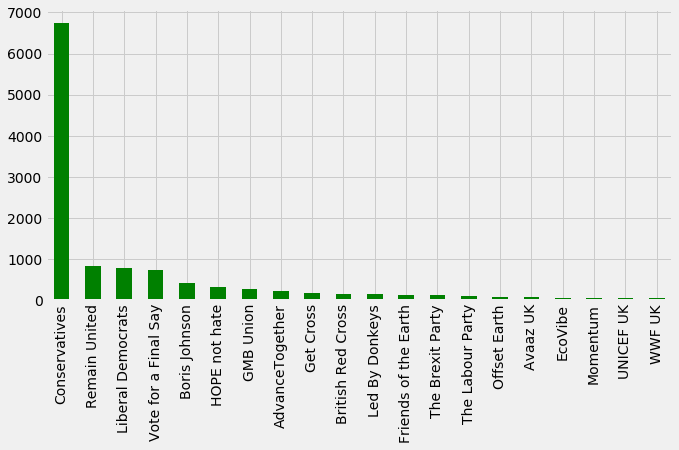

In [69]:
df1['page_name'].value_counts().head(20).plot(kind='bar',x='page_name',y='number', color ='green', figsize=(10,5))

### Filter by party

1. Create a filter that retrieves only ads published by specific pages
2. Group ads by unique body and count how many times they have been promoted
3. Change time format to see when the ads were published

In [43]:
cons = df1[df1['page_name'] == 'Conservatives']

In [44]:
cons.shape

(6752, 23)

In [45]:
cons['ad_creative_body'].value_counts().head(20)

Let's end the chaos and uncertainty and make Parliament work for you again.                                                                                                                              2476
🏥 We’re investing more in our NHS so we can deliver world-class care when you need it. 👇                                                                                                                 1161
We need to get Brexit done so we can focus on your priorities - like the NHS, schools and police.                                                                                                         951
Labour’s reckless spending plans would hand an additional £2,400 bill to every hardworking taxpayer every year.                                                                                           601
The Conservatives are giving the NHS its biggest cash boost in history - and making sure this funding gets to your local hospital and GPs.                                      

In [46]:
cons.sort_values("ad_delivery_start_time", ascending=False).head(100)

,key,task_key,page_index,page_subindex,ad_creation_time,ad_delivery_start_time,ad_delivery_stop_time,ad_snapshot_url,ad_archive_id,ad_creative_body,ad_creative_link_title,ad_creative_link_description,ad_creative_link_caption,page_id,page_name,funding_entity,low_impressions,high_impressions,low_spend,high_spend,currency,demographic_distribution,region_distribution
3175,3176,3,2,990,2019-12-04 19:17:55+00:00,2019-12-04 19:17:55+00:00,NaN,https://www.facebook.com/ads/archive/render_ad/?id=1483068328514188&access_token=EAAE0ruItRCIBAH...,1483068328514188,"""A vote for Boris Johnson this time around is a vote to get Brexit done""\n\nFormer Labour Minist...",Former Labour Minister Gisela Stuart backs Boris to get Brexit done,NaN,NaN,8807334278,Conservatives,The Conservative Party,0,999.0,0,99.0,GBP,"[{""age"":""65+"",""gender"":""male"",""percentage"":""0.555556""},{""age"":""45-54"",""gender"":""male"",""percentag...","[{""percentage"":""0.888889"",""region"":""England""},{""percentage"":""0.111111"",""region"":""Wales""}]"
3177,3178,3,2,992,2019-12-04 19:14:00+00:00,2019-12-04 19:14:00+00:00,NaN,https://www.facebook.com/ads/archive/render_ad/?id=983695011986888&access_token=EAAE0ruItRCIBAHZ...,983695011986888,"""A vote for Boris Johnson this time around is a vote to get Brexit done""\n\nFormer Labour Minist...",Former Labour Minister Gisela Stuart backs Boris to get Brexit done,NaN,NaN,8807334278,Conservatives,The Conservative Party,25000,29999.0,300,399.0,GBP,"[{""age"":""25-34"",""gender"":""male"",""percentage"":""0.155477""},{""age"":""65+"",""gender"":""unknown"",""percen...","[{""percentage"":""0.943122"",""region"":""England""},{""percentage"":""0.056878"",""region"":""Wales""}]"
3670,3671,4,3,77,2019-12-04 17:17:06+00:00,2019-12-04 17:17:06+00:00,NaN,https://www.facebook.com/ads/archive/render_ad/?id=409642673247368&access_token=EAAE0ruItRCIBAHZ...,409642673247368,"Parliament is not working. Brexit is holding us all back. Let’s get it done, move on, invest mor...",NaN,NaN,NaN,8807334278,Conservatives,The Conservative Party,0,999.0,0,99.0,GBP,"[{""age"":""25-34"",""gender"":""female"",""percentage"":""0.064516""},{""age"":""25-34"",""gender"":""male"",""perce...","[{""percentage"":""1"",""region"":""England""}]"
3672,3673,4,3,79,2019-12-04 17:17:06+00:00,2019-12-04 17:17:06+00:00,NaN,https://www.facebook.com/ads/archive/render_ad/?id=1275793635955396&access_token=EAAE0ruItRCIBAH...,1275793635955396,9 years ago Labour left us a note saying there was no money left. Don't let it happen again. Vot...,NaN,NaN,NaN,8807334278,Conservatives,The Conservative Party,0,999.0,0,99.0,GBP,"[{""age"":""45-54"",""gender"":""male"",""percentage"":""0.088889""},{""age"":""55-64"",""gender"":""female"",""perce...","[{""percentage"":""1"",""region"":""England""}]"
3671,3672,4,3,78,2019-12-04 17:17:06+00:00,2019-12-04 17:17:06+00:00,NaN,https://www.facebook.com/ads/archive/render_ad/?id=989621038069824&access_token=EAAE0ruItRCIBAHZ...,989621038069824,"Parliament is broken. We’re having an election to get this done, move the country on & focus on ...",NaN,NaN,NaN,8807334278,Conservatives,The Conservative Party,1000,1999.0,0,99.0,GBP,"[{""age"":""35-44"",""gender"":""male"",""percentage"":""0.144536""},{""age"":""25-34"",""gender"":""male"",""percent...","[{""percentage"":""1"",""region"":""England""}]"
3673,3674,4,3,80,2019-12-04 17:17:05+00:00,2019-12-04 17:17:05+00:00,NaN,https://www.facebook.com/ads/archive/render_ad/?id=454106028581269&access_token=EAAE0ruItRCIBAHZ...,454106028581269,"Parliament is not working. Brexit is holding us all back. Let’s get it done, move on, invest mor...",NaN,NaN,NaN,8807334278,Conservatives,The Conservative Party,0,999.0,0,99.0,GBP,"[{""age"":""35-44"",""gender"":""male"",""percentage"":""0.145695""},{""age"":""25-34"",""gender"":""male"",""percent...","[{""percentage"":""1"",""region"":""England""}]"
3675,3676,4,3,82,2019-12-04 17:17:05+00:00,2019-12-04 17:17:05+00:00,NaN,https://www.facebook.com/ads/archive/ren

In [57]:
LibDem = df1[df1['page_name'] == 'Liberal Democrats']
LibDem['ad_creative_body'].value_counts()

Boris Johnson is too divisive to be Prime Minister. Only the Liberal Democrats can stop Boris Johnson.                                                                                                                    73
Boris Johnson will lie and break the law to get what he wants. Britain deserves better than Boris Johnson.                                                                                                                73
Boris Johnson is dividing the country. Britain deserves better than Boris Johnson.                                                                                                                                        73
Boris Johnson lied to Parliament and the Queen. He thinks he can get away with it. You can stop him.                                                                                                                      72
You can stop Boris Johnson by voting Liberal Democrat on 12 December.                                               

In [70]:
Labour = df1[df1['page_name'] == 'The Labour Party']
Labour['ad_creative_body'].value_counts().head(10)

REMINDER: Make sure you vote. 12 December is polling day.\n \nUse our handy tool to find your polling station 👇                                                           8
REMINDER: Your last chance to vote is 10 pm, Thursday 12 December.\n \nDo you know where your polling station is? Use our handy tool to plan your journey  👇              8
⏰ It's almost time to vote. Polls close at 10 pm, Thursday 12 December. ⏰ \n \nDo you know where you can cast your ballot? Use our handy tool to plan your journey  👇     8
12 December is voting day. Make sure you know how to get to your polling station.\n \nOur handy tool will help you plan your journey 👇                                    8
The General Election is almost here. Polls close at 10 pm, Thursday 12 December. Do you know where you're voting? \n\nUse our tool to plan your journey to the polls 👇    8
Do you know how you’re getting to the polls on 12 December?\n \nUse our handy tool to plan your journey to the voting booth 👇               

In [71]:
Brexit = df1[df1['page_name'] == 'Brexit Party']
Brexit['ad_creative_body'].value_counts()

Series([], Name: ad_creative_body, dtype: int64)

In [73]:
df1["ad_creation_time"] = df1["ad_creation_time"].str.split(" ", n = 1, expand = True)
df1.head(2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,key,task_key,page_index,page_subindex,ad_creation_time,ad_delivery_start_time,ad_delivery_stop_time,ad_snapshot_url,ad_archive_id,ad_creative_body,ad_creative_link_title,ad_creative_link_description,ad_creative_link_caption,page_id,page_name,funding_entity,low_impressions,high_impressions,low_spend,high_spend,currency,demographic_distribution,region_distribution
1,2,1,0,1,2019-12-01,2019-12-01 19:03:43+00:00,NaN,https://www.facebook.com/ads/archive/render_ad/?id=280332876242445&access_token=EAAE0ruItRCIBAHZ...,280332876242445,Let's end the chaos and uncertainty and make Parliament work for you again.,End the chaos. Vote Conservative.,Get Brexit Done. Unleash Britain's Potential.,VOTE.CONSERVATIVES.COM,8807334278,Conservatives,The Conservative Party,0,999.0,0,99.0,GBP,"[{""age"":""45-54"",""gender"":""male"",""percentage"":""1""}]","[{""percentage"":""1"",""region"":""England""}]"
2,3,1,0,2,2019-12-01,2019-12-01 19:03:44+00:00,NaN,https://www.facebook.com/ads/archive/render_ad/?id=285774335651410&access_token=EAAE0ruItRCIBAHZ...,285774335651410,Let's end the chaos and uncertainty and make Parliament work for you again.,End the chaos. Vote Conservative.,Get Brexit Done. Unleash Britain's Potential.,VOTE.CONSERVATIVES.COM,8807334278,Conservatives,The Conservative Party,0,999.0,0,99.0,GBP,"[{""age"":""45-54"",""gender"":""male"",""percentage"":""1""}]","[{""percentage"":""1"",""region"":""England""}]"


In [75]:
df1['ad_creation_time'].value_counts().head(20)

2019-12-02    4708
2019-12-04    3440
2019-12-01    3414
2019-12-03    2997
2019-11-29      19
2019-11-07      18
2019-11-26       9
2019-11-30       9
2019-11-28       3
2019-11-25       2
2019-11-21       1
Name: ad_creation_time, dtype: int64